<a href="https://colab.research.google.com/github/Anjaszz/Klasifikasi-Penyakit-Daun-Anggur/blob/main/Klasifikasi_penyakit_daun_anggur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model Klasifikasi penyakit pada daun anggur menggunakan CNN(Convolutional Neural Network)**
**Created by Anjas rani**

https://anjasrani.my.id

# **Ekstraksi Dataset Anggur dari File ZIP**
Pada code dibawah ini, kita mengekstrak dataset anggur yang disimpan dalam file ZIP. Proses ini memungkinkan kita untuk mengakses gambar-gambar daun anggur yang akan digunakan untuk melatih model klasifikasi. Setelah diekstrak, kita juga akan memeriksa struktur direktori dari dataset yang diambil.


In [75]:
import zipfile, os
local_zip = '/tmp/grape-data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/grape-data'
os.listdir(base_dir)


['LeafBlight', 'BlackRot', 'BlackMeasles', 'HealthyGrapes']

# **Mengatur Data dan Preprocessing untuk Klasifikasi Gambar Menggunakan CNN**
Kode ini mempersiapkan dataset gambar untuk pelatihan model Convolutional Neural Network (CNN). Menggunakan ImageDataGenerator, gambar dinormalisasi dan dibagi menjadi data pelatihan dan validasi. Metode flow_from_directory memuat gambar dari folder berdasarkan kelas, dengan ukuran gambar ditetapkan ke 150x150 piksel.

In [99]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2
)


train_data = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)


validation_data = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1282 images belonging to 4 classes.
Found 320 images belonging to 4 classes.


# **Pembangunan Model Convolutional Neural Network (CNN)**
Kode dibawah ini membangun model CNN untuk klasifikasi gambar. Model terdiri dari beberapa lapisan konvolusi (Conv2D) dan lapisan pengambilan sampel maksimum (MaxPooling2D) untuk mengekstraksi fitur dari gambar. Setelah lapisan konvolusi, gambar diratakan dengan Flatten() sebelum masuk ke lapisan dense (Dense) yang memiliki 128 neuron dan fungsi aktivasi ReLU. Dropout ditambahkan untuk mencegah overfitting. Lapisan output memiliki 4 neuron (untuk 4 kelas) dan menggunakan fungsi aktivasi softmax. Model kemudian dikompilasi menggunakan optimizer Adam dan loss categorical crossentropy.

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Melatih Model**
Kode ini untuk melatih model menggunakan data pelatihan dan validasi. EarlyStopping digunakan untuk menghentikan pelatihan jika tidak ada perbaikan pada nilai val_loss selama 5 epoch berturut-turut, mencegah overfitting. Model dilatih selama 20 epoch dengan langkah per epoch ditetapkan ke 32 dan langkah validasi ke 8. Hasil dari pelatihan disimpan dalam variabel history, yang dapat digunakan untuk menganalisis performa model selama pelatihan.

In [89]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)


history = model.fit(
    train_data,
    steps_per_epoch=32 ,
    validation_data=validation_data,
    validation_steps=8,
    epochs=20,
    callbacks=[early_stopping]
)


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.9255 - loss: 0.2088 - val_accuracy: 0.9492 - val_loss: 0.1878
Epoch 2/20
 9/32 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9435 - loss: 0.1055

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 383ms/step - accuracy: 0.9479 - loss: 0.1060 - val_accuracy: 0.9219 - val_loss: 0.1563
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.9766 - loss: 0.0703 - val_accuracy: 0.9375 - val_loss: 0.2379
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 447ms/step - accuracy: 0.9447 - loss: 0.1359 - val_accuracy: 0.8906 - val_loss: 0.2151
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.9692 - loss: 0.0990 - val_accuracy: 0.9453 - val_loss: 0.1883
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 426ms/step - accuracy: 0.9844 - loss: 0.0426 - val_accuracy: 0.9844 - val_loss: 0.1404
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.9717 - loss: 0.0703 - val_accuracy: 0.9531 - val_loss: 0.1673
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 381ms/step - accuracy: 0.9870 - loss: 0.0413 - val_accuracy: 0.9531 - val_loss: 0.0935
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.9820 - loss: 0.0479 - val_accuracy: 0.9648 - val_loss

# **Visualisasi Akurasi dan Kerugian Model**
memvisualisasikan kinerja model selama pelatihan. Pertama, grafik akurasi model ditampilkan dengan memplot akurasi data latih dan validasi berdasarkan epoch. Ini membantu untuk melihat apakah model belajar dengan baik. Kedua, grafik kerugian (loss) model juga ditampilkan dengan memplot kerugian untuk data latih dan validasi. Grafik ini berguna untuk menganalisis apakah model mengalami overfitting atau underfitting. Kedua grafik ditampilkan menggunakan library Matplotlib, memberikan wawasan visual tentang performa model selama proses pelatihan.

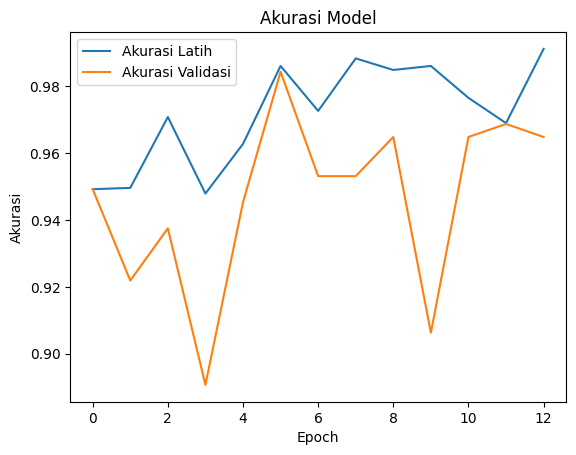

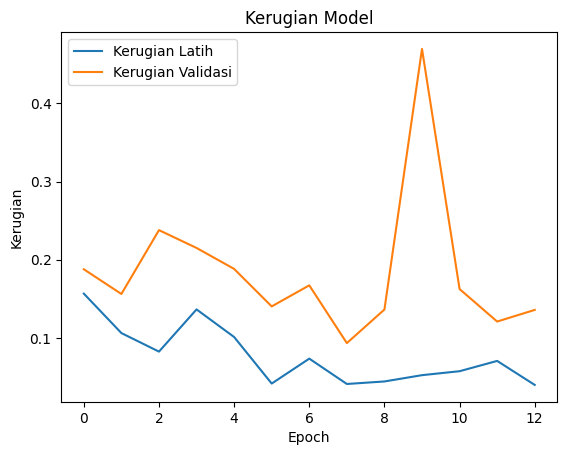

In [90]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Akurasi Latih')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Akurasi Model')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Kerugian Latih')
plt.plot(history.history['val_loss'], label='Kerugian Validasi')
plt.title('Kerugian Model')
plt.ylabel('Kerugian')
plt.xlabel('Epoch')
plt.legend()
plt.show()


# **Analisis Prediksi Menggunakan confusion matrix dan Laporan Klasifikasi**
 untuk mengevaluasi performa model dengan menghasilkan matriks kebingungan dan laporan klasifikasi. Matriks kebingungan menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas, sedangkan laporan klasifikasi memberikan metrik seperti precision, recall, dan f1-score untuk menilai akurasi model dalam mengklasifikasikan data validasi.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


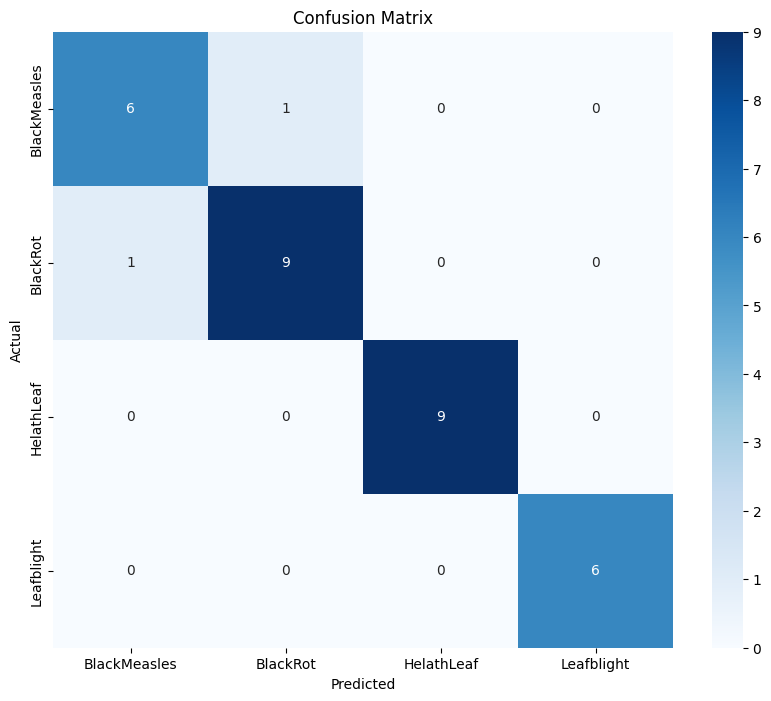

              precision    recall  f1-score   support

BlackMeasles       0.86      0.86      0.86         7
    BlackRot       0.90      0.90      0.90        10
  HelathLeaf       1.00      1.00      1.00         9
  Leafblight       1.00      1.00      1.00         6

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32



In [92]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

val_images, val_labels = next(validation_data)
predictions = model.predict(val_images)
predicted_classes = np.argmax(predictions, axis=1)

cm = confusion_matrix(np.argmax(val_labels, axis=1), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(np.argmax(val_labels, axis=1), predicted_classes, target_names=class_names))


# **Prediksi Gambar**

Saving blackrot.jpg to blackrot (3).jpg


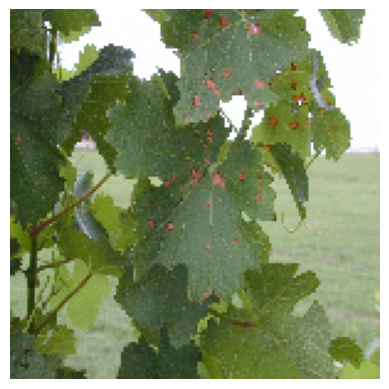

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediksi: BlackRot dengan probabilitas: 1.00
Gambar: blackrot (3).jpg


In [102]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded = files.upload()

class_names = ['BlackMeasles','BlackRot','HelathLeaf', 'Leafblight']

for fn in uploaded.keys():

    path = fn
    img = image.load_img(path, target_size=(150, 150))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    classes = model.predict(x)

    predicted_class = np.argmax(classes[0])

    print(f'Prediksi: {class_names[predicted_class]} dengan probabilitas: {classes[0][predicted_class]:.2f}')
    print(f'Gambar: {fn}')

